# 2.1 — Create Interaction Features

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set color theme (you can change the hex codes later)
COLOR_AGE_HT = '#81E7AF'   # blue
COLOR_AGE_HD = '#DC8BE0'   # orange

In [3]:
# Load the train and test sets (adjust path if needed)
train_df = pd.read_csv("F:\\stroke-prediction-project\\data\\processed\\stroke_train.csv")
test_df = pd.read_csv("F:\\stroke-prediction-project\\data\\processed\\stroke_test.csv")

In [4]:
# -----------------------------
# 1. Create Interaction Features
# -----------------------------
for df in [train_df, test_df]:
    df['age_ht'] = df['age'] * df['hypertension']
    df['age_hd'] = df['age'] * df['heart_disease']

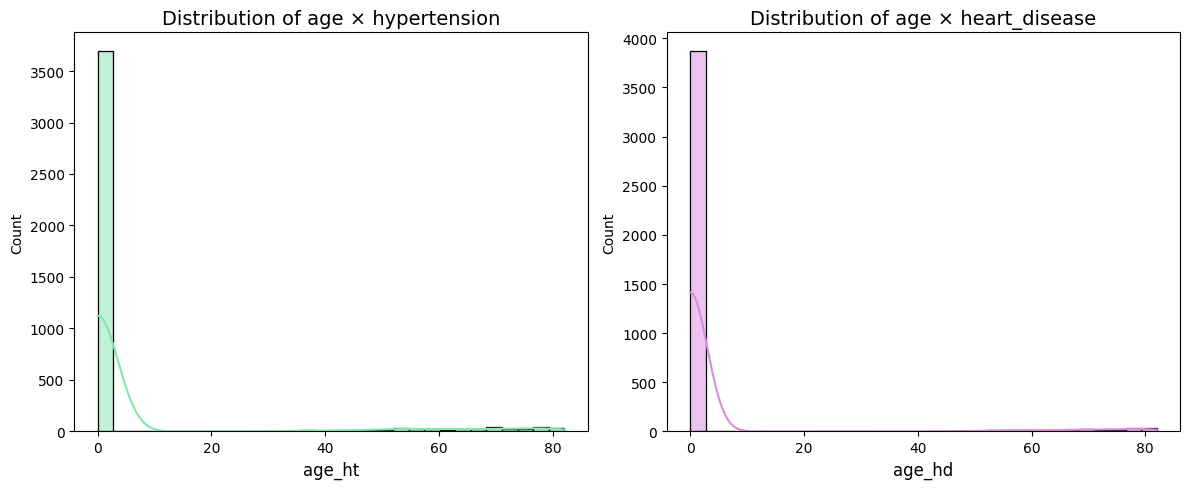

In [5]:
# -----------------------------
# 2. Visualize Distributions (train only)
# -----------------------------
plt.figure(figsize=(12, 5))

# Plot age × hypertension
plt.subplot(1, 2, 1)
sns.histplot(train_df['age_ht'], bins=30, kde=True, color=COLOR_AGE_HT)
plt.title('Distribution of age × hypertension', fontsize=14)
plt.xlabel('age_ht', fontsize=12)

# Plot age × heart_disease
plt.subplot(1, 2, 2)
sns.histplot(train_df['age_hd'], bins=30, kde=True, color=COLOR_AGE_HD)
plt.title('Distribution of age × heart_disease', fontsize=14)
plt.xlabel('age_hd', fontsize=12)

plt.tight_layout()
plt.show()

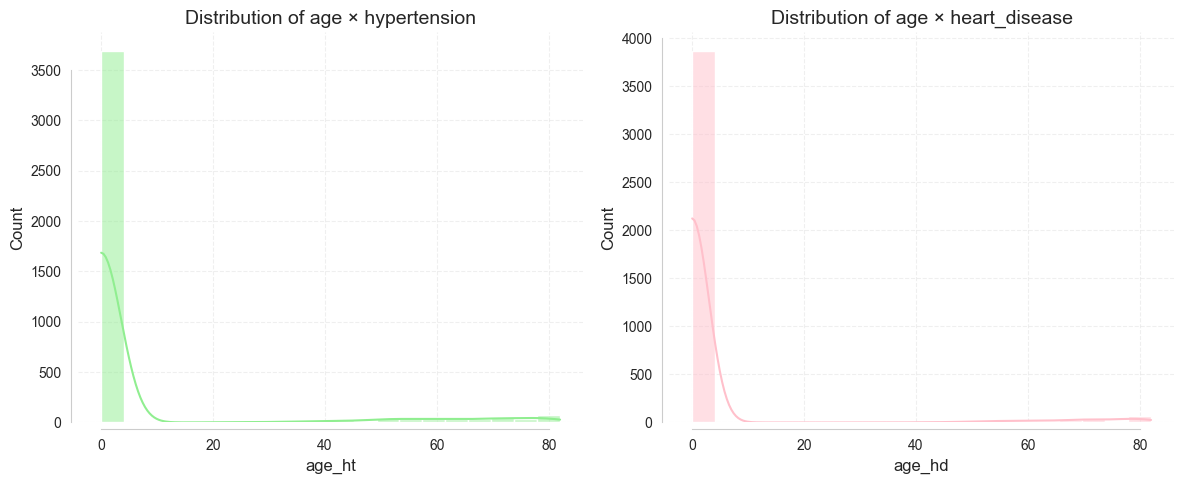

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
COLOR_AGE_HT = "#90EE90"  # Light green
COLOR_AGE_HD = "#FFC0CB"  # Pink

plt.figure(figsize=(12, 5))

# Plot age × hypertension
plt.subplot(1, 2, 1)
sns.histplot(train_df['age_ht'], bins=20, kde=True, color=COLOR_AGE_HT)
plt.title('Distribution of age × hypertension', fontsize=14)
plt.xlabel('age_ht', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine(ax=plt.gca(), offset=5, trim=True)

# # Highlight key observation
# plt.annotate(
#     'Peak at ~0',
#     xy=(5, 3500),  # Adjust coordinates based on your data
#     xytext=(10, 3800),
#     arrowprops=dict(facecolor='black', arrowstyle='->'),
#     fontsize=10
# )

# Plot age × heart_disease
plt.subplot(1, 2, 2)
sns.histplot(train_df['age_hd'], bins=20, kde=True, color=COLOR_AGE_HD)
plt.title('Distribution of age × heart_disease', fontsize=14)
plt.xlabel('age_hd', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine(ax=plt.gca(), offset=5, trim=True)

# # Highlight key observation
# plt.annotate(
#     'Peak at ~0',
#     xy=(5, 4000),  # Adjust coordinates based on your data
#     xytext=(10, 4300),
#     arrowprops=dict(facecolor='black', arrowstyle='->'),
#     fontsize=10
# )

# Adjust layout
plt.tight_layout()

# Save the figure
output_dir = r"F:\stroke-prediction-project\figures"
os.makedirs(output_dir, exist_ok=True)

pdf_path_ht = os.path.join(output_dir, "age_ht_distribution.pdf")
png_path_ht = os.path.join(output_dir, "age_ht_distribution.png")

pdf_path_hd = os.path.join(output_dir, "age_hd_distribution.pdf")
png_path_hd = os.path.join(output_dir, "age_hd_distribution.png")

plt.savefig(pdf_path_ht, dpi=300, bbox_inches='tight')
plt.savefig(png_path_ht, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path_hd, dpi=300, bbox_inches='tight')
plt.savefig(png_path_hd, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [6]:
# -----------------------------
# 3. Save Updated DataFrames
# -----------------------------
train_df.to_csv("F:\\stroke-prediction-project\\data\\processed\\stroke_train_step2.csv", index=False)
test_df.to_csv("F:\\stroke-prediction-project\\data\\processed\\stroke_test_step2.csv", index=False)

print("✅ Interaction features created and saved!")

✅ Interaction features created and saved!


# 2.2 — 📈 Risk Scores

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import matplotlib.colors as mcolors

In [8]:
# Load previously saved train and test CSVs
train_path = "F:\\stroke-prediction-project\\data\\processed\\stroke_train_step2.csv"
test_path = "F:\\stroke-prediction-project\\data\\processed\\stroke_test_step2.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [9]:
# -------------------------
# Create new features
# -------------------------
# Small epsilon to avoid division by zero
epsilon = 1e-5

# Ratio of glucose to BMI
train_df['glucose_bmi_ratio'] = train_df['avg_glucose_level'] / (train_df['bmi'] + epsilon)
test_df['glucose_bmi_ratio'] = test_df['avg_glucose_level'] / (test_df['bmi'] + epsilon)

# Cardiovascular risk score: log(age+1) + hypertension + heart_disease
train_df['CV_risk'] = np.log(train_df['age'] + 1) + train_df['hypertension'] + train_df['heart_disease']
test_df['CV_risk'] = np.log(test_df['age'] + 1) + test_df['hypertension'] + test_df['heart_disease']

# Lifestyle index: smoking status + work_type + residence_type
def compute_lifestyle_index(row):
    score = 0
    if row['smoking_status'] in ['smokes', 'formerly smoked']:
        score += 1
    if row['work_type'] in ['Self-employed', 'Govt_job']:
        score += 1
    if row['Residence_type'] == 'Rural':
        score += 1
    return score

train_df['lifestyle_index'] = train_df.apply(compute_lifestyle_index, axis=1)
test_df['lifestyle_index'] = test_df.apply(compute_lifestyle_index, axis=1)

# Log of glucose_bmi_ratio
train_df['log_glucose_bmi_ratio'] = np.log(train_df['glucose_bmi_ratio'] + epsilon)
test_df['log_glucose_bmi_ratio'] = np.log(test_df['glucose_bmi_ratio'] + epsilon)

In [10]:
# -------------------------
# Skew analysis
# -------------------------
skewed_features = ['glucose_bmi_ratio', 'log_glucose_bmi_ratio', 'CV_risk', 'lifestyle_index']
skewness_vals = train_df[skewed_features].skew()

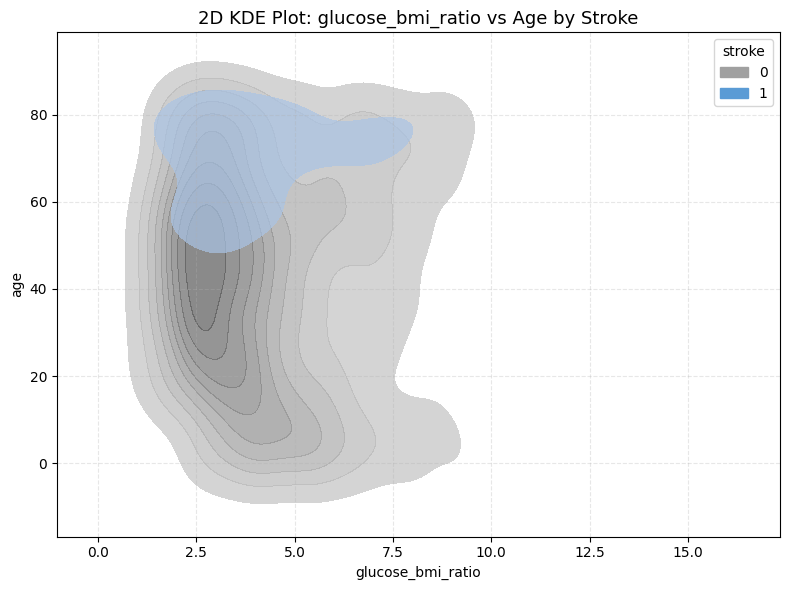

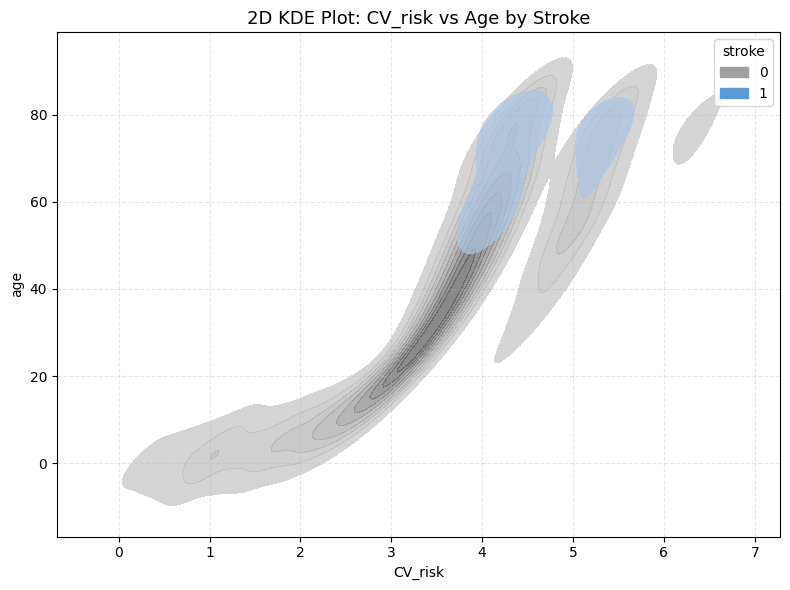

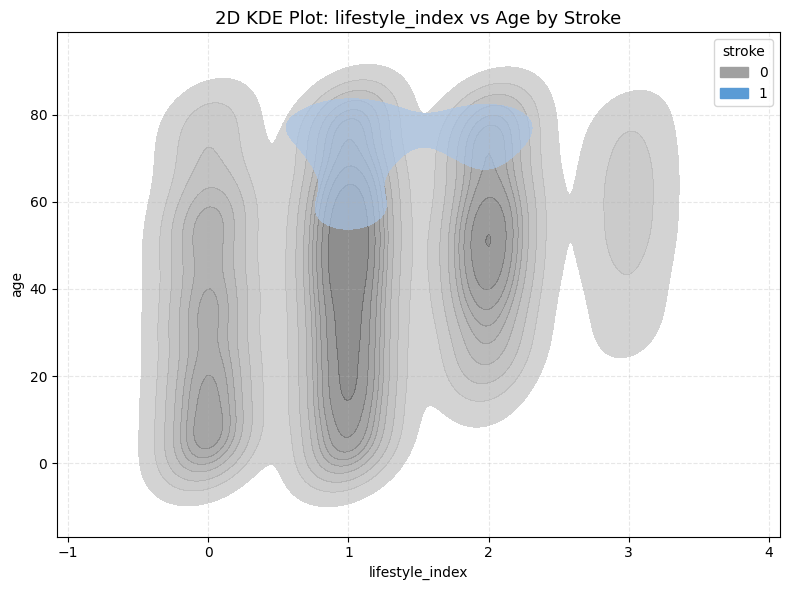

In [11]:
# -------------------------
# 2D KDE Plots
# -------------------------
plot_hex = "#5A9BD5"
for feature in ['glucose_bmi_ratio', 'CV_risk', 'lifestyle_index']:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(
        data=train_df, x=feature, y='age', hue='stroke', fill=True, thresh=0.05,
        palette={0: "#A0A0A0", 1: plot_hex}, alpha=0.7
    )
    plt.title(f'2D KDE Plot: {feature} vs Age by Stroke', fontsize=13)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

F:\stroke-prediction-project\stroke-env\Lib\site-packages\seaborn\distributions.py:1176: UserWarning:

linewidths is ignored by contourf



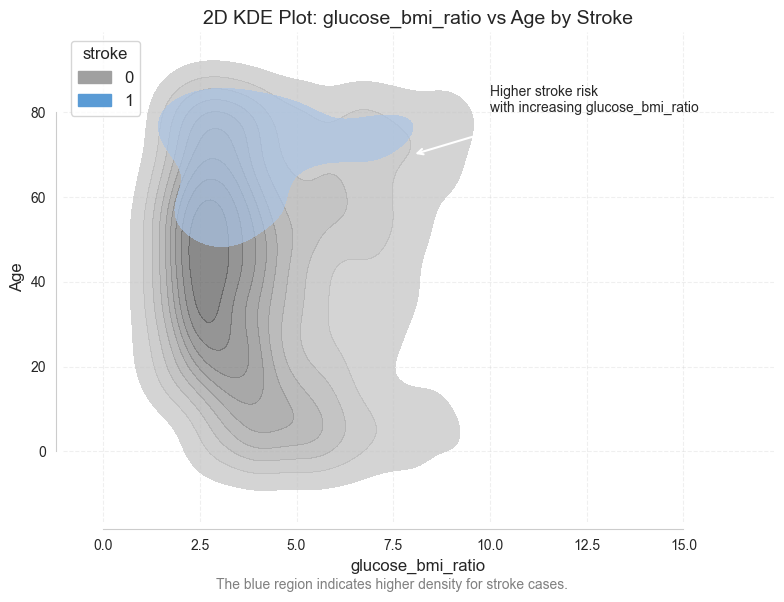

F:\stroke-prediction-project\stroke-env\Lib\site-packages\seaborn\distributions.py:1176: UserWarning:

linewidths is ignored by contourf



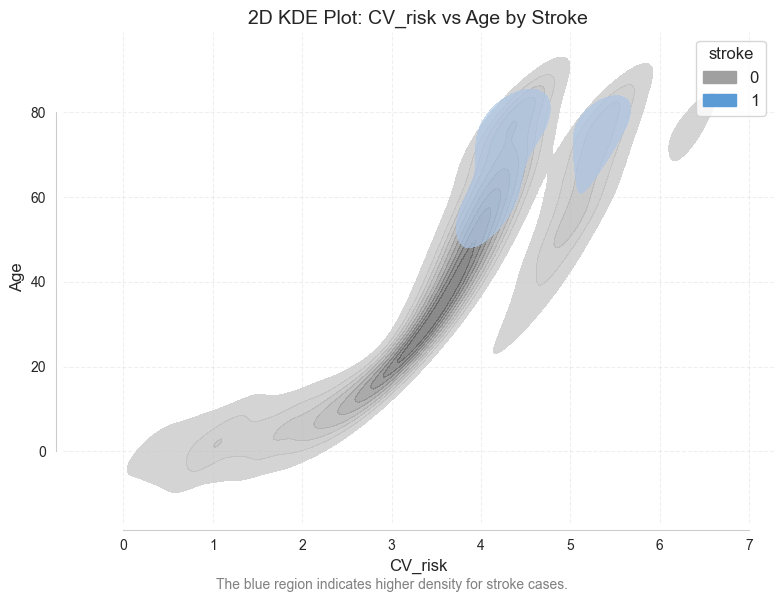

F:\stroke-prediction-project\stroke-env\Lib\site-packages\seaborn\distributions.py:1176: UserWarning:

linewidths is ignored by contourf



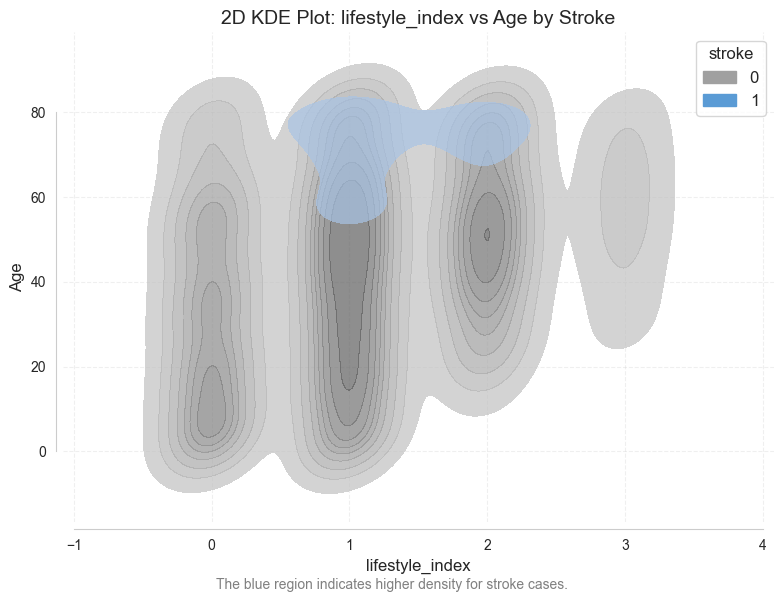

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font sizes for clarity
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

plot_hex = "#5A9BD5"
features = ['glucose_bmi_ratio', 'CV_risk', 'lifestyle_index']

# Output directory
output_dir = r"F:\stroke-prediction-project\figures"
os.makedirs(output_dir, exist_ok=True)

for feature in features:
    plt.figure(figsize=(8, 6))
    
    # Create 2D KDE plot
    sns.kdeplot(
        data=train_df, x=feature, y='age', hue='stroke', fill=True, thresh=0.05,
        palette={0: "#A0A0A0", 1: plot_hex}, alpha=0.7, linewidths=0.5
    )
    
    # Customize appearance
    plt.title(f'2D KDE Plot: {feature} vs Age by Stroke', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Age', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Remove top/right spines
    sns.despine(ax=plt.gca(), offset=5, trim=True)
    
    # Add descriptive caption below
    plt.figtext(0.5, 0.005, 
                "The blue region indicates higher density for stroke cases.",
                ha="center", fontsize=10, color='gray')
    
    # Highlight key observation (optional)
    if feature == 'glucose_bmi_ratio':
        plt.annotate(
            'Higher stroke risk\nwith increasing glucose_bmi_ratio',
            xy=(8, 70),  # Adjust coordinates based on your data
            xytext=(10, 80),
            arrowprops=dict(facecolor='#3E7CB1', arrowstyle='->', lw=1.5),  # Darker blue arrow
            fontsize=10
        )
    
    # Save the figure
    pdf_path = os.path.join(output_dir, f"{feature}_vs_age_by_stroke.pdf")
    png_path = os.path.join(output_dir, f"{feature}_vs_age_by_stroke.png")
    
    plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
    plt.savefig(png_path, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

C:\Program Files\KMSpico\temp\ipykernel_3032\2894317937.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




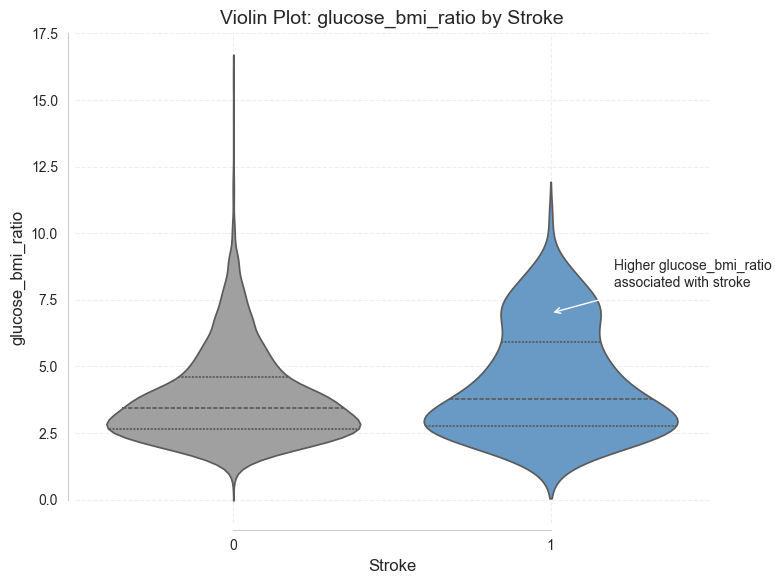

C:\Program Files\KMSpico\temp\ipykernel_3032\2894317937.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




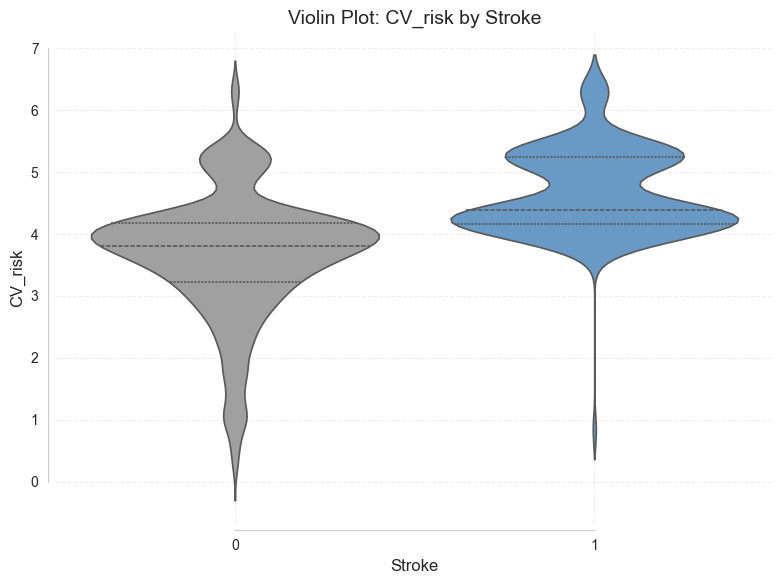

C:\Program Files\KMSpico\temp\ipykernel_3032\2894317937.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




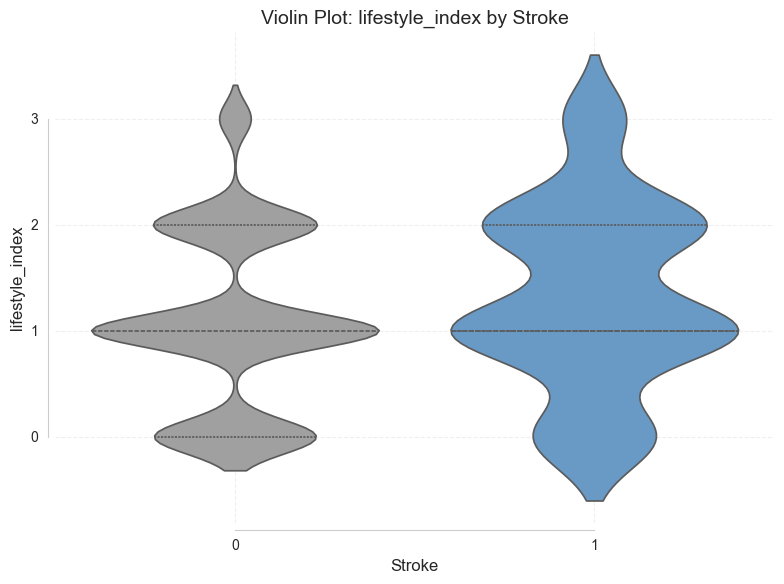

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['glucose_bmi_ratio', 'CV_risk', 'lifestyle_index']

# Define color palette
palette = ["#A0A0A0", "#5A9BD5"]

for feature in features:
    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(
        data=train_df,
        x='stroke',
        y=feature,
        palette=palette,
        inner="quartile"
    )

    # Customize appearance
    plt.title(f"Violin Plot: {feature} by Stroke", fontsize=14)
    plt.xlabel("Stroke", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Remove top/right spines
    sns.despine(ax=plt.gca(), offset=5, trim=True)

    # # Add descriptive caption below
    # plt.figtext(0.5, 0.005,
    #             "Violin plots showing the distribution of [feature] by stroke status.",
    #             ha="center", fontsize=10, color='gray')

    # Highlight key observations (optional)
    if feature == 'glucose_bmi_ratio':
        plt.annotate(
            'Higher glucose_bmi_ratio\nassociated with stroke',
            xy=(1, 7),  # Adjust coordinates based on your data
            xytext=(1.2, 8),
            arrowprops=dict(facecolor='#3E7CB1', arrowstyle='->'),
            fontsize=10
        )

    # Save the figure
    output_dir = r"F:\stroke-prediction-project\figures"
    os.makedirs(output_dir, exist_ok=True)

    pdf_path = os.path.join(output_dir, f"{feature}_violin_plot.pdf")
    png_path = os.path.join(output_dir, f"{feature}_violin_plot.png")

    plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
    plt.savefig(png_path, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.tight_layout()
    plt.show()

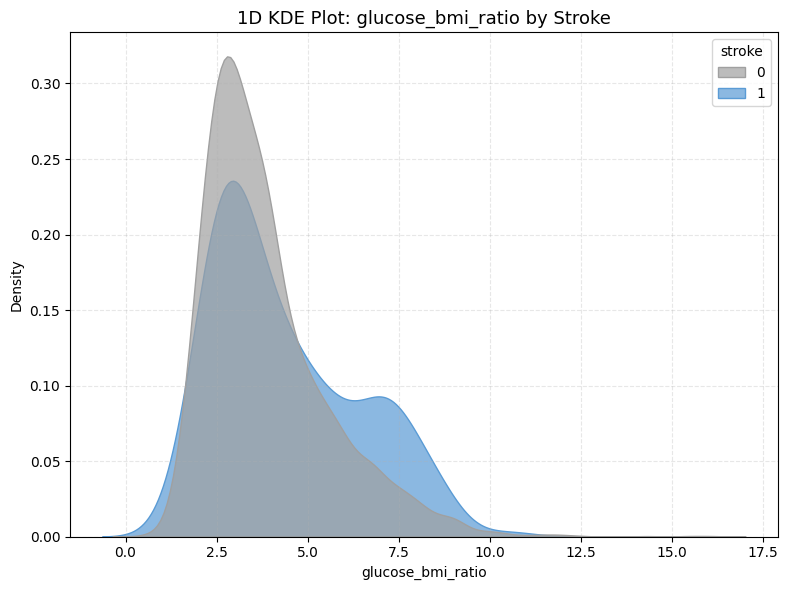

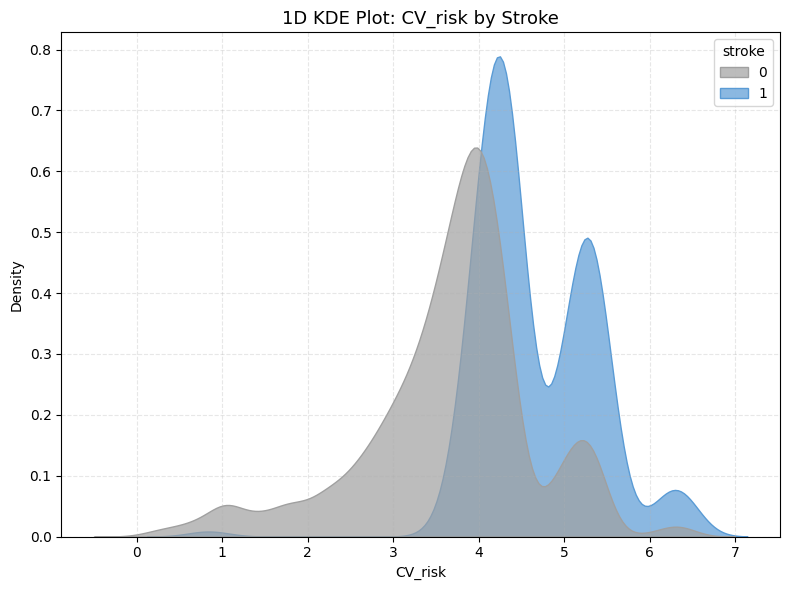

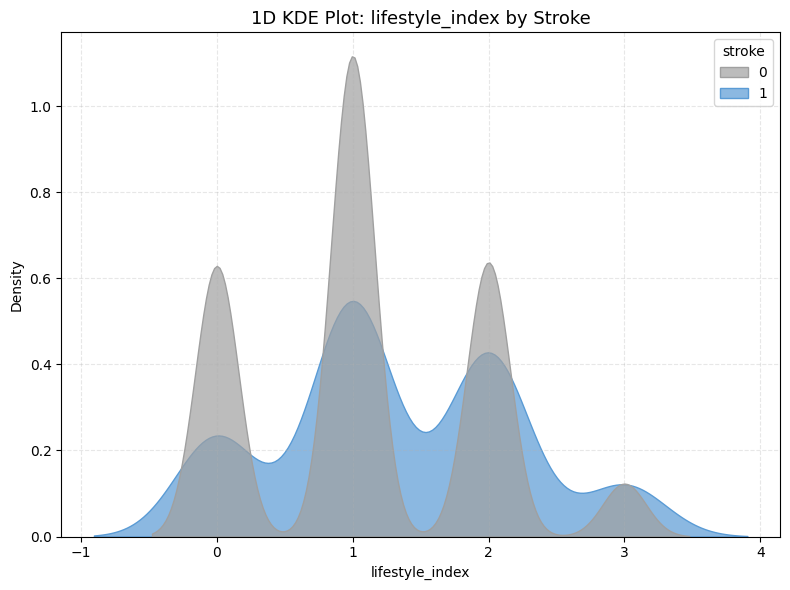

In [20]:
# -------------------------
# 1D KDE Plots
# -------------------------
plot_hex = "#5A9BD5"

for feature in ['glucose_bmi_ratio', 'CV_risk', 'lifestyle_index']:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(
        data=train_df, x=feature, hue='stroke', fill=True,
        palette={0: "#A0A0A0", 1: plot_hex}, alpha=0.7, common_norm=False
    )
    plt.title(f'1D KDE Plot: {feature} by Stroke', fontsize=13)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [23]:
#pip install matplotlib seaborn statsmodels joypy

C:\Program Files\KMSpico\temp\ipykernel_3032\585985558.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




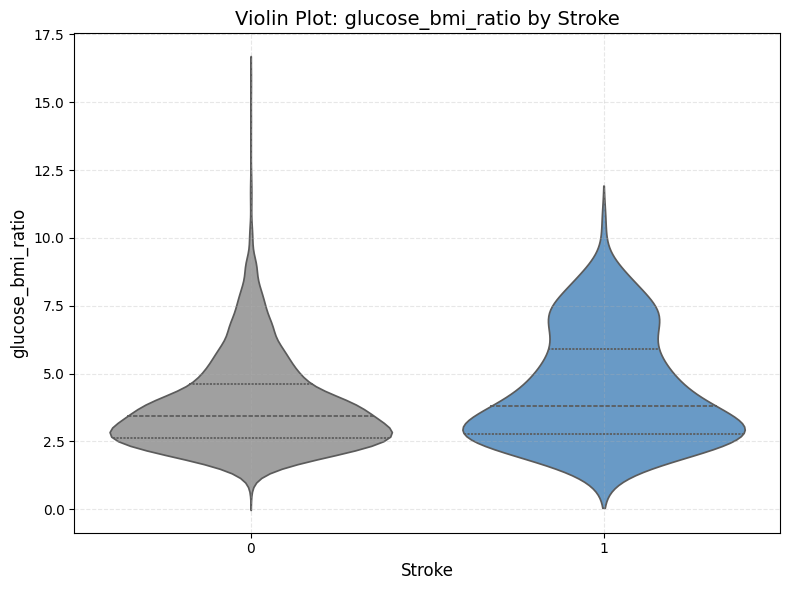

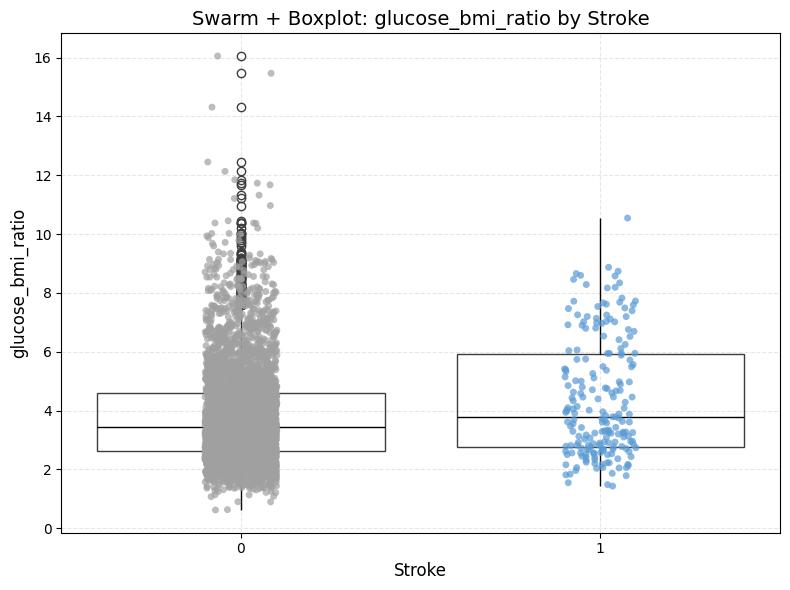

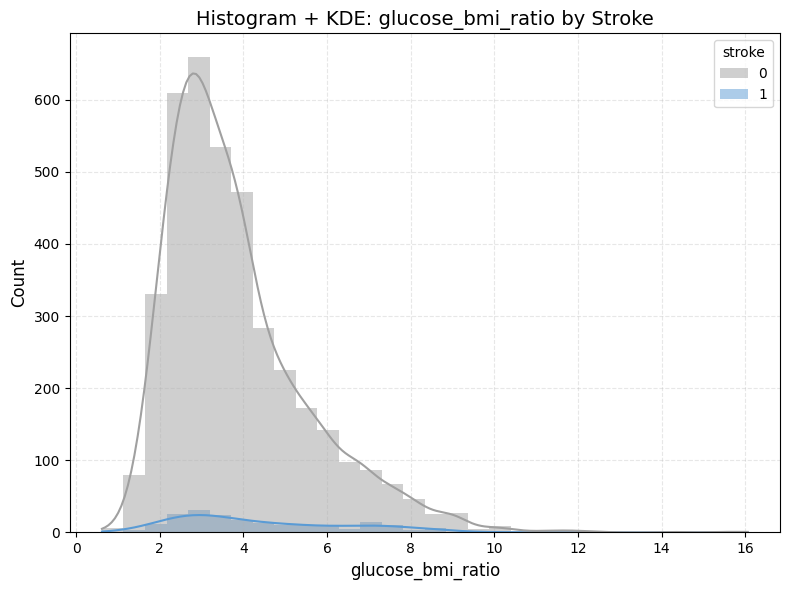

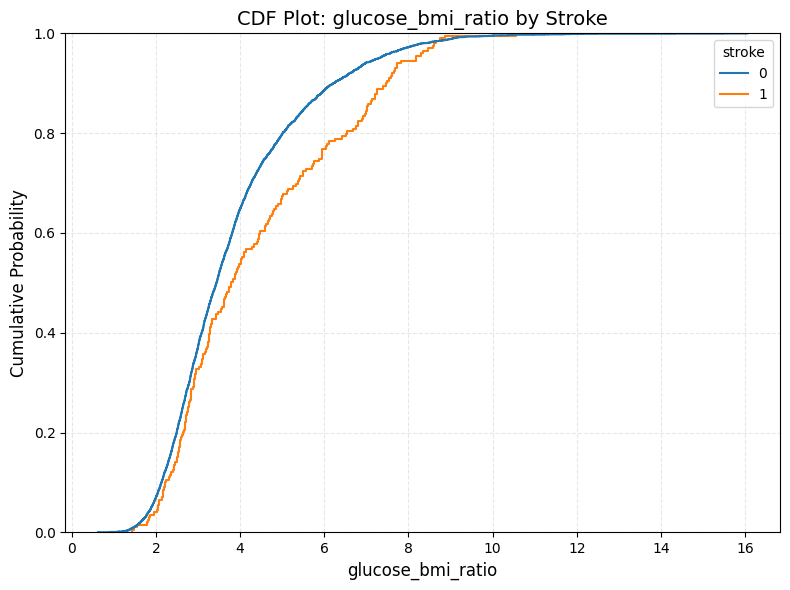

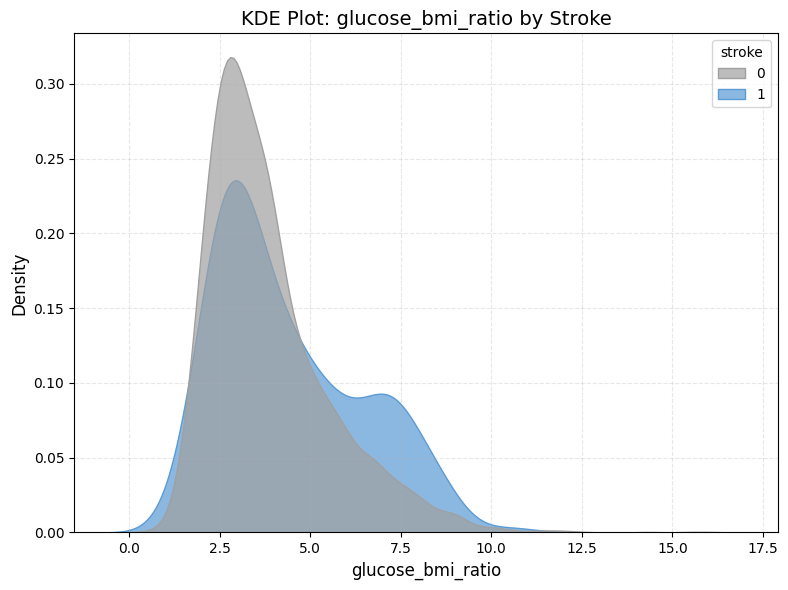

C:\Program Files\KMSpico\temp\ipykernel_3032\585985558.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




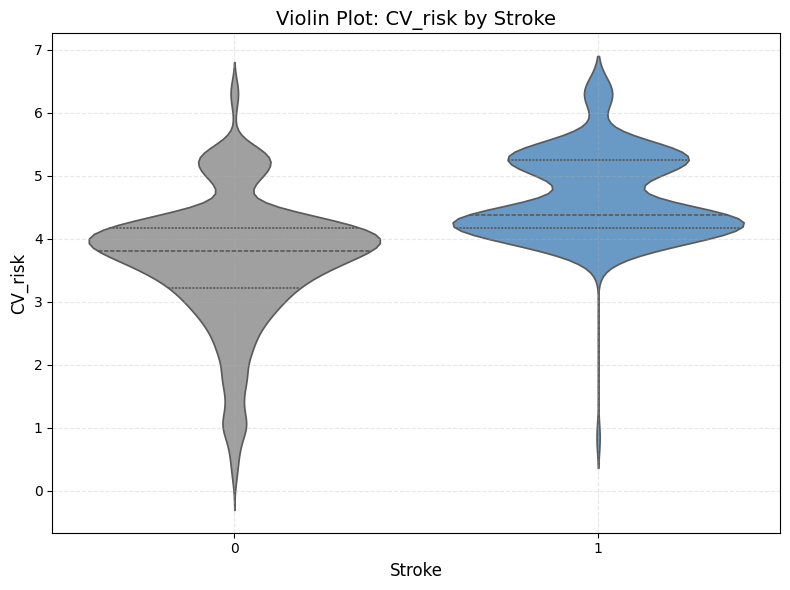

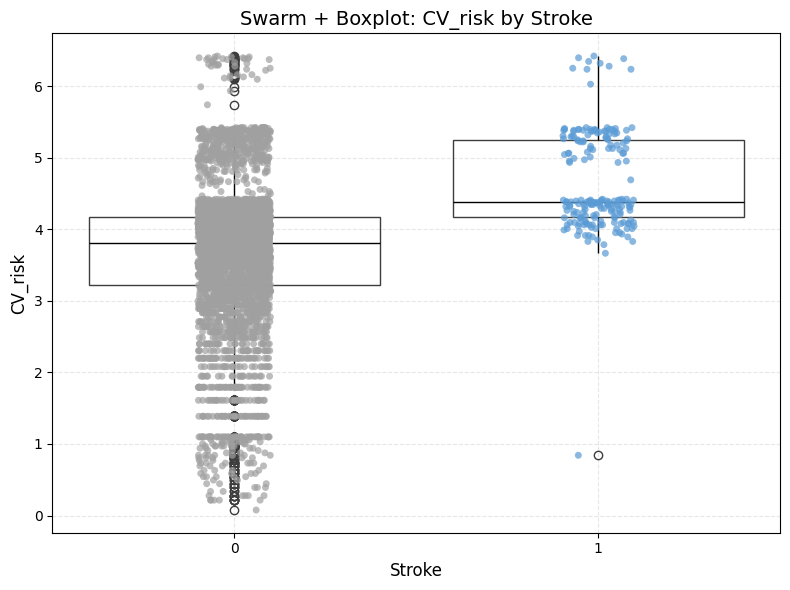

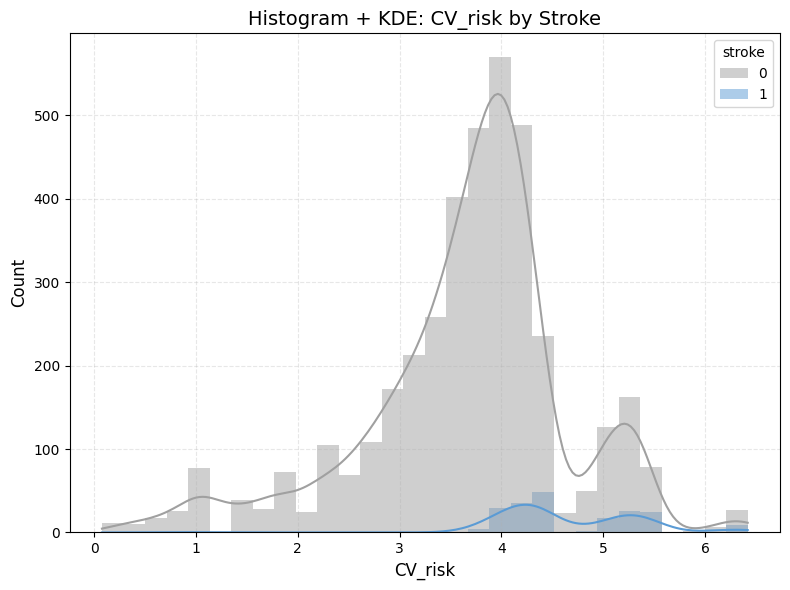

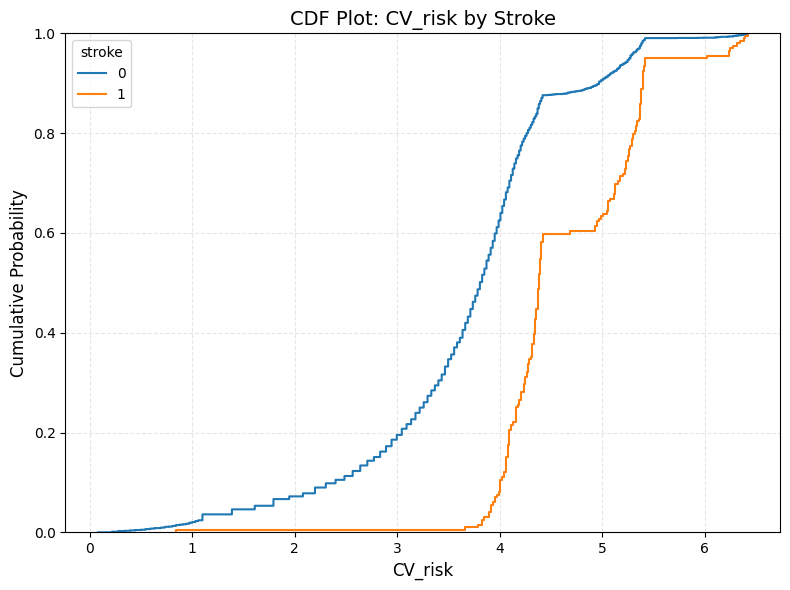

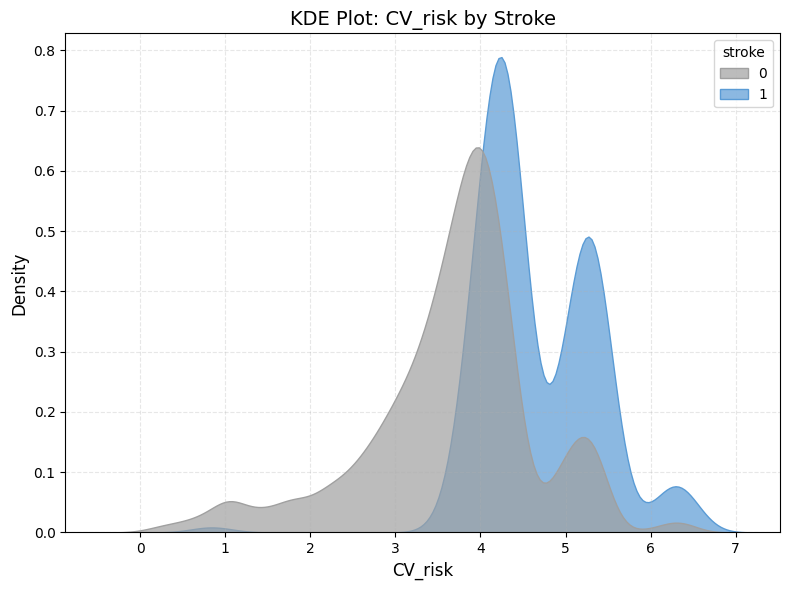

C:\Program Files\KMSpico\temp\ipykernel_3032\585985558.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




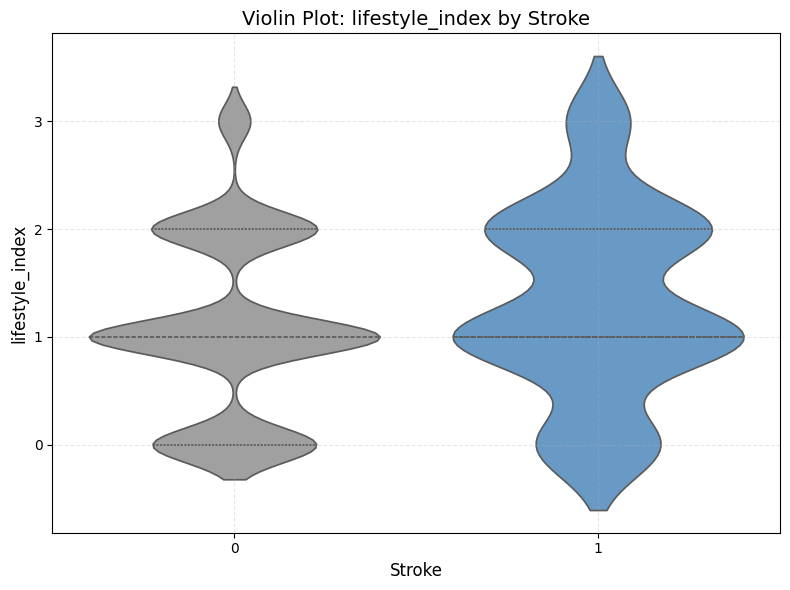

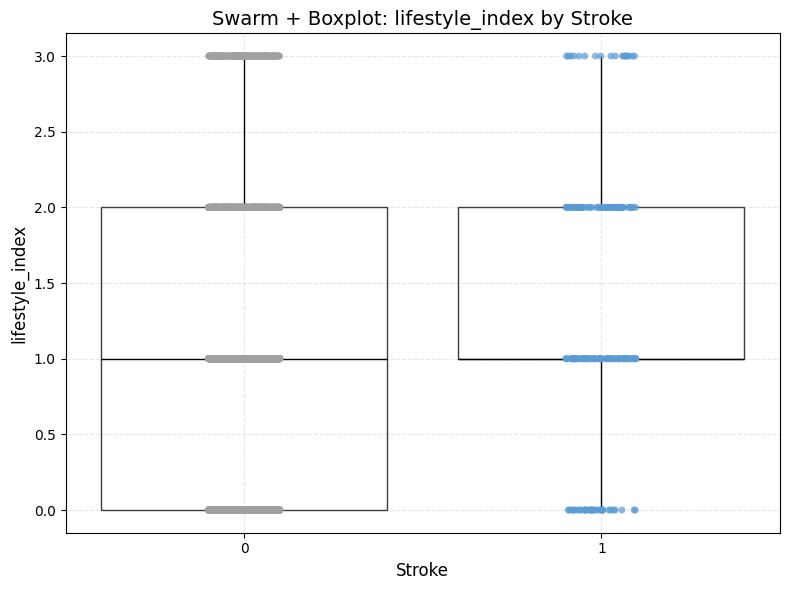

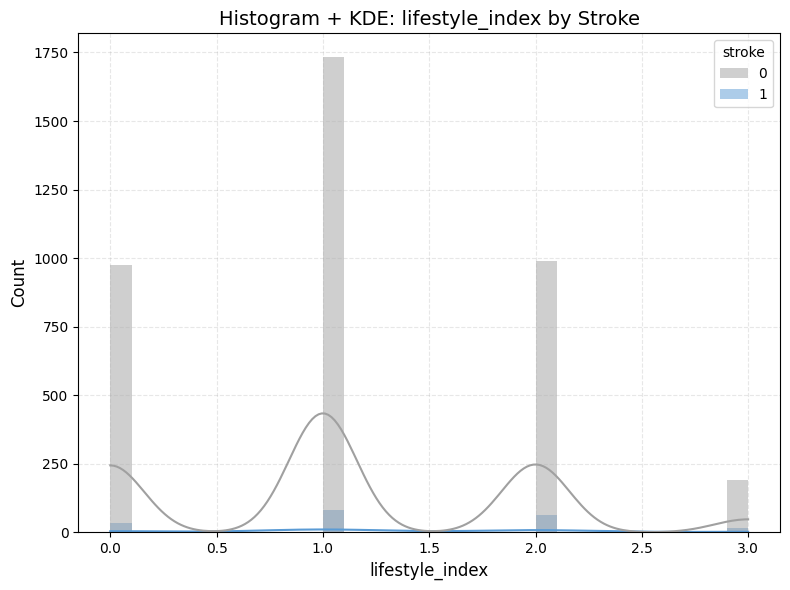

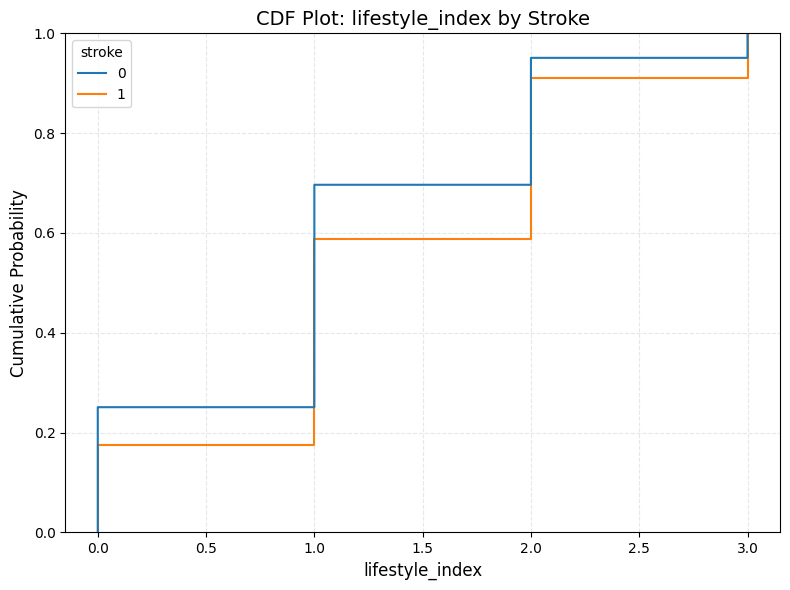

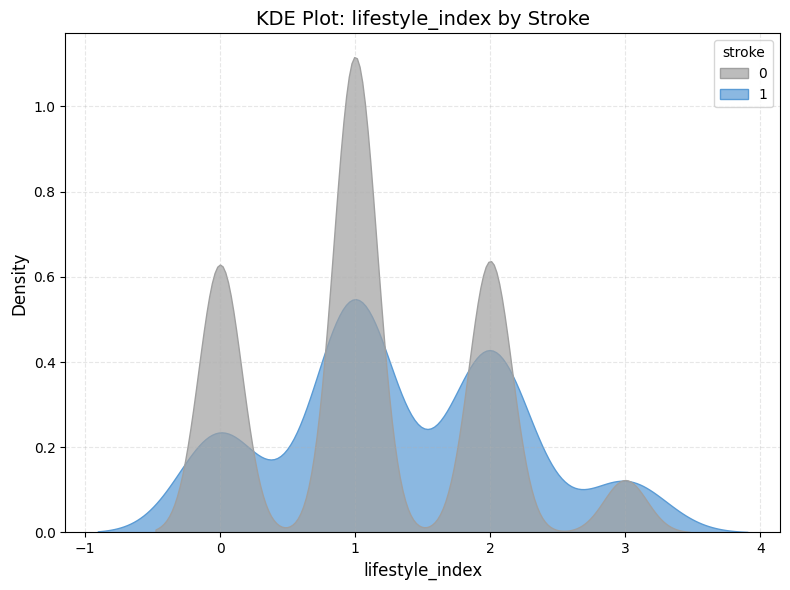

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# List of features to plot
features = ['glucose_bmi_ratio', 'CV_risk', 'lifestyle_index']

# Define color palette
palette = {"#A0A0A0", "#5A9BD5"}

for feature in features:
    # 1. Violin Plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=train_df, x='stroke', y=feature,
                   palette=["#A0A0A0", "#5A9BD5"], inner="quartile")
    plt.title(f"Violin Plot: {feature} by Stroke", fontsize=14)
    plt.xlabel("Stroke", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2. Boxplot + Swarmplot (Combined)
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=train_df, x='stroke', y=feature,
                  hue='stroke', palette=["#A0A0A0", "#5A9BD5"],
                  jitter=True, alpha=0.7, dodge=False)
    sns.boxplot(data=train_df, x='stroke', y=feature,
                showcaps=False, boxprops={'facecolor': 'None'},
                medianprops=dict(color="black"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"))
    plt.title(f"Swarm + Boxplot: {feature} by Stroke", fontsize=14)
    plt.xlabel("Stroke", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.legend([], [], frameon=False)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 3. Histogram + KDE
    plt.figure(figsize=(8, 6))
    sns.histplot(data=train_df, x=feature, hue='stroke',
                 bins=30, kde=True, palette=["#A0A0A0", "#5A9BD5"],
                 alpha=0.5, edgecolor=None)
    plt.title(f"Histogram + KDE: {feature} by Stroke", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 4. CDF Plot
    plt.figure(figsize=(8, 6))
    sns.ecdfplot(data=train_df, x=feature, hue='stroke')
    plt.title(f"CDF Plot: {feature} by Stroke", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Cumulative Probability", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 5. KDE Only Plot
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=train_df, x=feature, hue='stroke',
                fill=True, common_norm=False,
                palette=["#A0A0A0", "#5A9BD5"], alpha=0.7)
    plt.title(f"KDE Plot: {feature} by Stroke", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

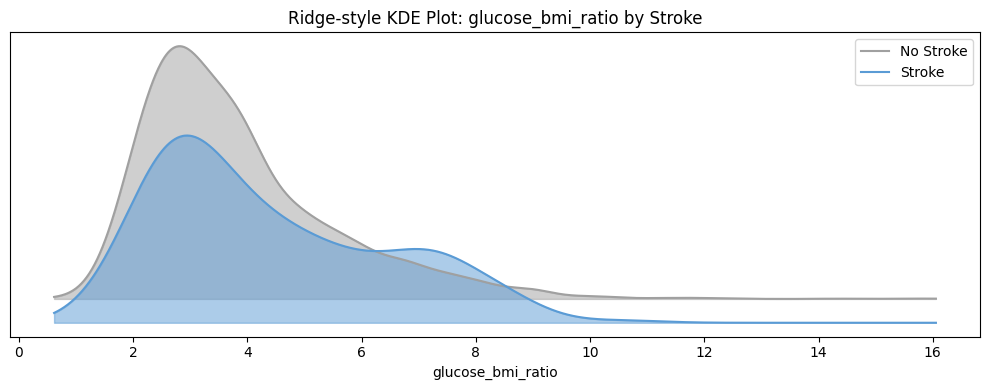

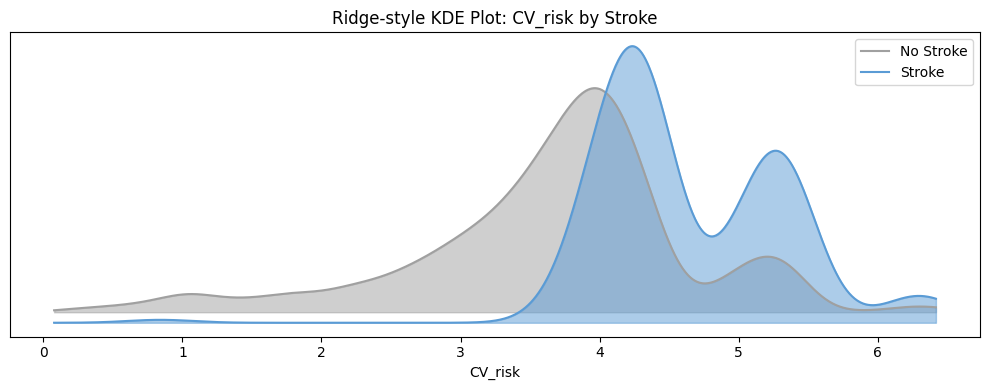

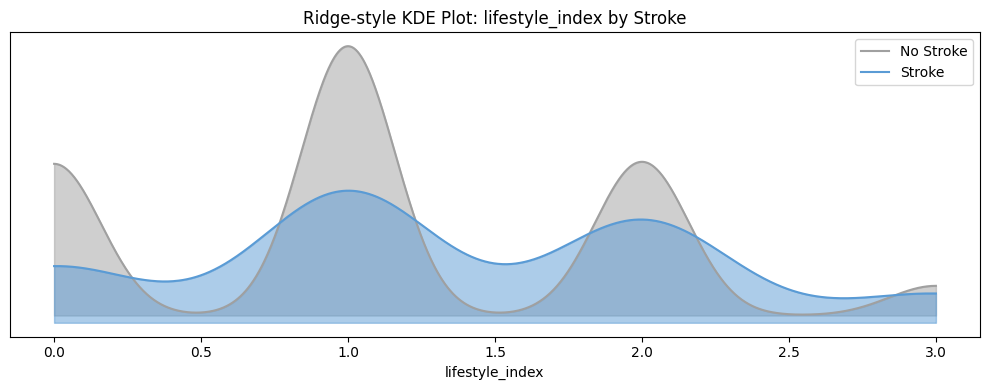

In [20]:
# Manual Ridge Plot Using Matplotlib + KDE
features = ['glucose_bmi_ratio', 'CV_risk', 'lifestyle_index']

for feature in features:
    group0 = train_df[train_df['stroke'] == 0][feature].values
    group1 = train_df[train_df['stroke'] == 1][feature].values

    x = np.linspace(min(np.min(group0), np.min(group1)), max(np.max(group0), np.max(group1)), 1000)
    kde0 = gaussian_kde(group0)(x)
    kde1 = gaussian_kde(group1)(x)

    offset = 0.015

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(x, kde0 + offset, color="#A0A0A0", label="No Stroke")
    ax.plot(x, kde1 - offset, color="#5A9BD5", label="Stroke")
    ax.fill_between(x, kde0 + offset, offset, color="#A0A0A0", alpha=0.5)
    ax.fill_between(x, kde1 - offset, -offset, color="#5A9BD5", alpha=0.5)

    ax.set_yticks([])
    ax.set_xlabel(feature)
    ax.legend()
    plt.title(f"Ridge-style KDE Plot: {feature} by Stroke")
    plt.tight_layout()
    plt.show()

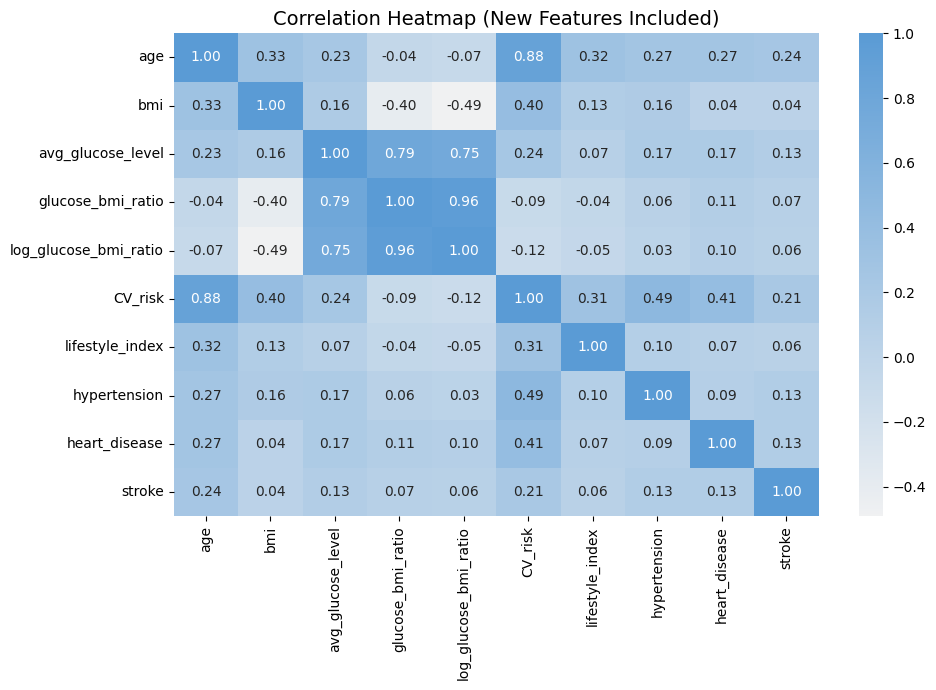

(   glucose_bmi_ratio  log_glucose_bmi_ratio   CV_risk  lifestyle_index  stroke
 0           2.090936               0.737617  3.891820                0       0
 1           5.821426               1.761547  2.772589                1       0
 2           4.434536               1.489425  4.219508                2       0
 3           2.637499               0.969835  3.806662                1       0
 4           2.605695               0.957703  2.708050                1       0,
 glucose_bmi_ratio        1.377864
 log_glucose_bmi_ratio    0.206661
 CV_risk                 -0.685299
 lifestyle_index          0.314187
 dtype: float64)

In [18]:
# -------------------------
# Correlation heatmap
# -------------------------
correlation_features = ['age', 'bmi', 'avg_glucose_level', 'glucose_bmi_ratio',
                        'log_glucose_bmi_ratio', 'CV_risk', 'lifestyle_index',
                        'hypertension', 'heart_disease', 'stroke']

plt.figure(figsize=(10, 7))
corr_matrix = train_df[correlation_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("light:#5A9BD5", as_cmap=True), fmt=".2f")
plt.title("Correlation Heatmap (New Features Included)", fontsize=14)
plt.tight_layout()
plt.show()

# Return skewness values and sample of train set to display
train_df[skewed_features + ['stroke']].head(), skewness_vals

# 2.3 — 🔁 Log Transform Skewed Features



In [12]:
import numpy as np

# Apply log1p transform to skewed features
for df in [train_df, test_df]:
    df['bmi_log'] = np.log1p(df['bmi'])
    df['glucose_log'] = np.log1p(df['avg_glucose_level'])

# Check skewness before and after
from scipy.stats import skew

print("Skewness Before:")
print(f"  BMI: {skew(train_df['bmi'].dropna()):.2f}")
print(f"  Glucose: {skew(train_df['avg_glucose_level'].dropna()):.2f}")

print("\nSkewness After:")
print(f"  BMI_log: {skew(train_df['bmi_log'].dropna()):.2f}")
print(f"  Glucose_log: {skew(train_df['glucose_log'].dropna()):.2f}")

Skewness Before:
  BMI: 1.15
  Glucose: 1.56

Skewness After:
  BMI_log: 0.04
  Glucose_log: 0.88


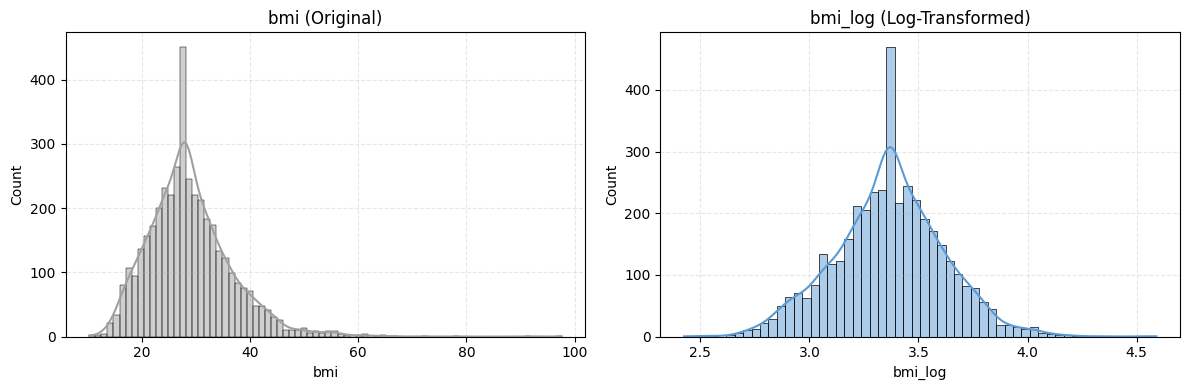

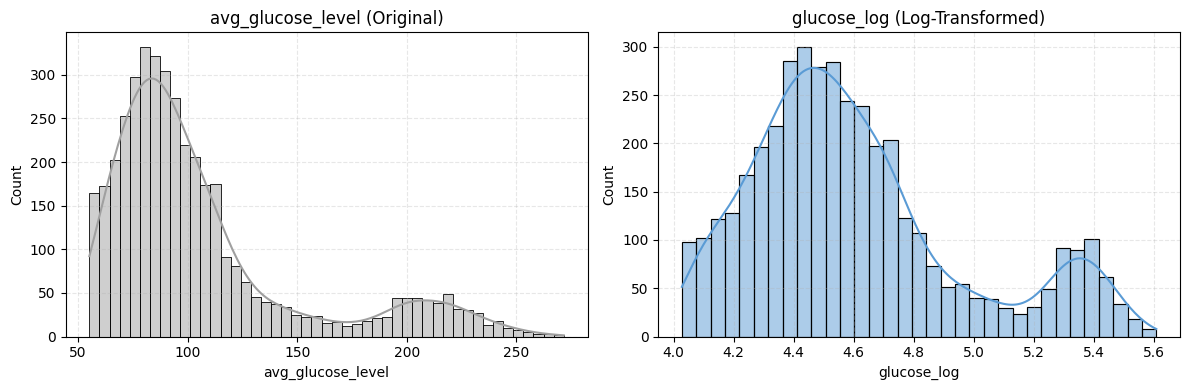

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_hex = "#5A9BD5"

features = [('bmi', 'bmi_log'), ('avg_glucose_level', 'glucose_log')]

for orig, logf in features:
    plt.figure(figsize=(12, 4))
    
    # Original
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[orig].dropna(), kde=True, color="#A0A0A0")
    plt.title(f'{orig} (Original)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Log-transformed
    plt.subplot(1, 2, 2)
    sns.histplot(train_df[logf].dropna(), kde=True, color=plot_hex)
    plt.title(f'{logf} (Log-Transformed)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


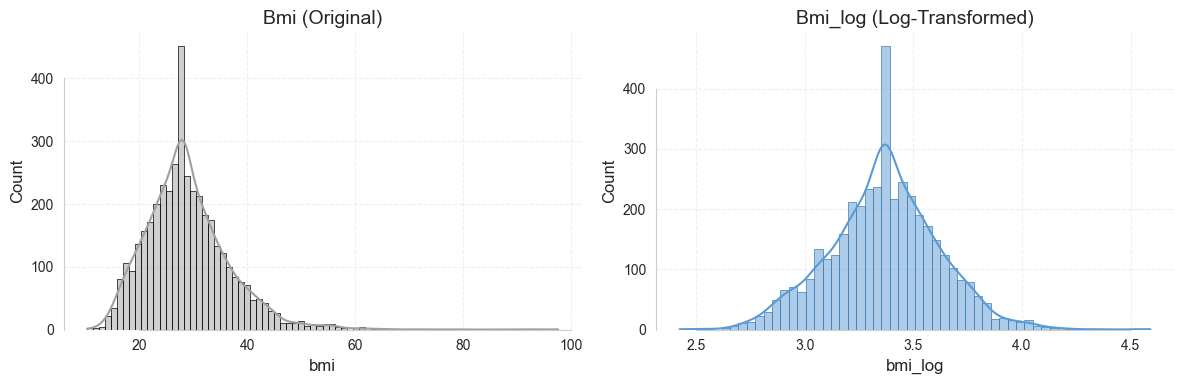

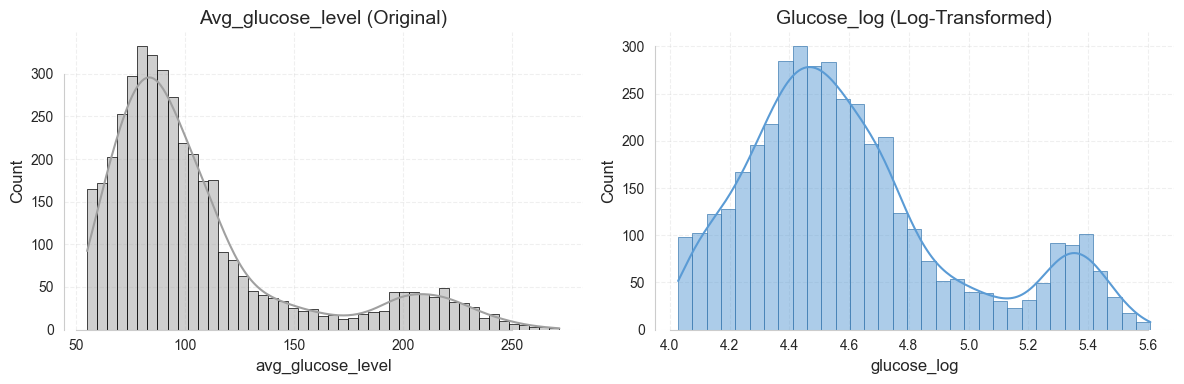

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style and color palette
sns.set_style("whitegrid")
plot_hex = "#5A9BD5"
features = [('bmi', 'bmi_log'), ('avg_glucose_level', 'glucose_log')]

# Increase default font size for publication clarity
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Output directory
output_dir = r"F:\stroke-prediction-project\figures"
os.makedirs(output_dir, exist_ok=True)

for orig, logf in features:
    plt.figure(figsize=(12, 4))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[orig].dropna(), kde=True, color="#A0A0A0", edgecolor='black', linewidth=0.5)
    plt.title(f'{orig.capitalize()} (Original)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.3)
    sns.despine(trim=True)

    # Log-transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(train_df[logf].dropna(), kde=True, color=plot_hex, edgecolor='#3E7CB1', linewidth=0.5)
    plt.title(f'{logf.capitalize()} (Log-Transformed)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.3)
    sns.despine(trim=True)

    plt.tight_layout()

    # Save the figure
    pdf_path = os.path.join(output_dir, f"{orig}_vs_{logf}.pdf")
    png_path = os.path.join(output_dir, f"{orig}_vs_{logf}.png")

    plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
    plt.savefig(png_path, dpi=300, bbox_inches='tight')

    plt.show()

# 2.4 — 🧠 Binning Age



In [13]:
# -------------------------
# Binning Age
# -------------------------
bins = [0, 25, 45, 65, 100]
labels = ['<25', '25–45', '45–65', '65+']
train_df['age_group'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=False)

C:\Program Files\KMSpico\temp\ipykernel_9688\2965883743.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = train_df.groupby('age_group')['stroke'].mean().reset_index()
C:\Program Files\KMSpico\temp\ipykernel_9688\2965883743.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


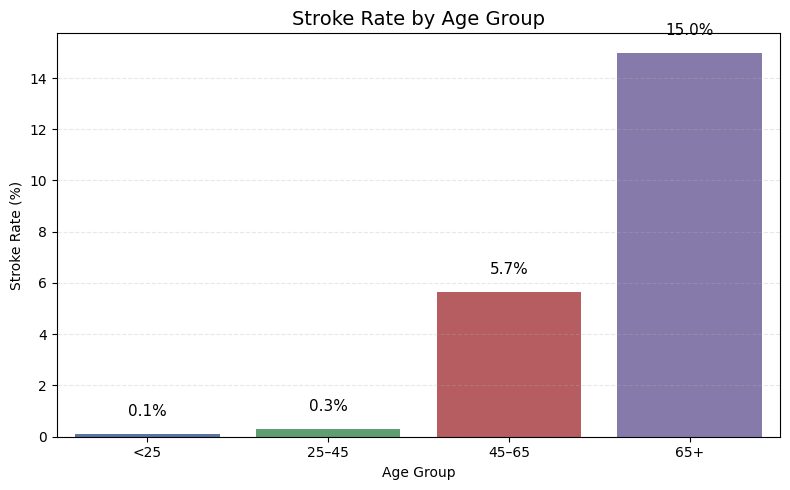

In [14]:
# -------------------------
# Stroke Rate by Age Group
# -------------------------
age_group_stats = train_df.groupby('age_group')['stroke'].mean().reset_index()
age_group_stats['stroke'] *= 100  # Convert to percentage

# Custom hex colors for each bar
bar_colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']  # Can be customized

plt.figure(figsize=(8, 5))
bars = sns.barplot(
    data=age_group_stats,
    x='age_group',
    y='stroke',
    palette=bar_colors
)

# Annotate percentage on top of each bar
for i, row in age_group_stats.iterrows():
    plt.text(i, row['stroke'] + 0.7, f"{row['stroke']:.1f}%", ha='center', fontsize=11)

plt.title("Stroke Rate by Age Group", fontsize=14)
plt.ylabel("Stroke Rate (%)")
plt.xlabel("Age Group")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Program Files\KMSpico\temp\ipykernel_3032\2588952646.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




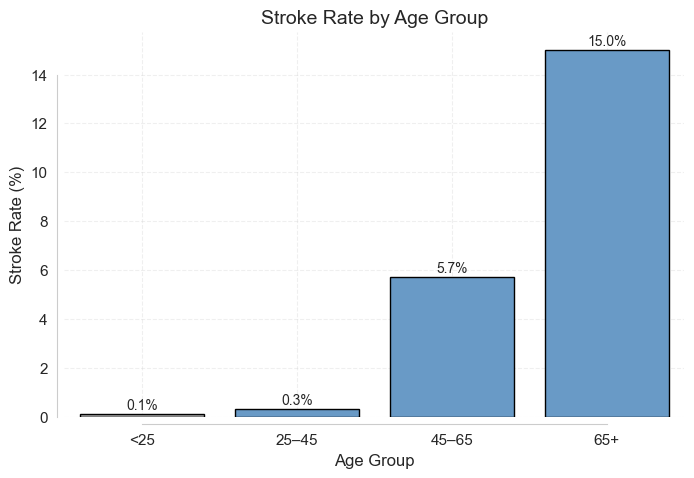

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
age_group_stats = {
    '<25': 0.1,
    '25–45': 0.3,
    '45–65': 5.7,
    '65+': 15.0
}

# Create the plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(age_group_stats.keys()),
    y=list(age_group_stats.values()),
    palette=["#A0A0A0", "#5A9BD5", "#5A9BD5", "#5A9BD5"],
    edgecolor='black'
)

# Add percentage labels on top of each bar
for i, v in enumerate(age_group_stats.values()):
    plt.text(i, v + 0.2, f'{v:.1f}%', ha='center', fontsize=10)

# Customize appearance
plt.title("Stroke Rate by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Stroke Rate (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine(offset=5, trim=True)

# Save to specific folder
output_dir = r"F:\stroke-prediction-project\figures"

# Create directory if it doesn't exist
import os
os.makedirs(output_dir, exist_ok=True)

pdf_path = os.path.join(output_dir, "stroke_rate_by_age.pdf")
png_path = os.path.join(output_dir, "stroke_rate_by_age.png")

plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.savefig(png_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# 2.5 — Heatmap of Correlation Matrix

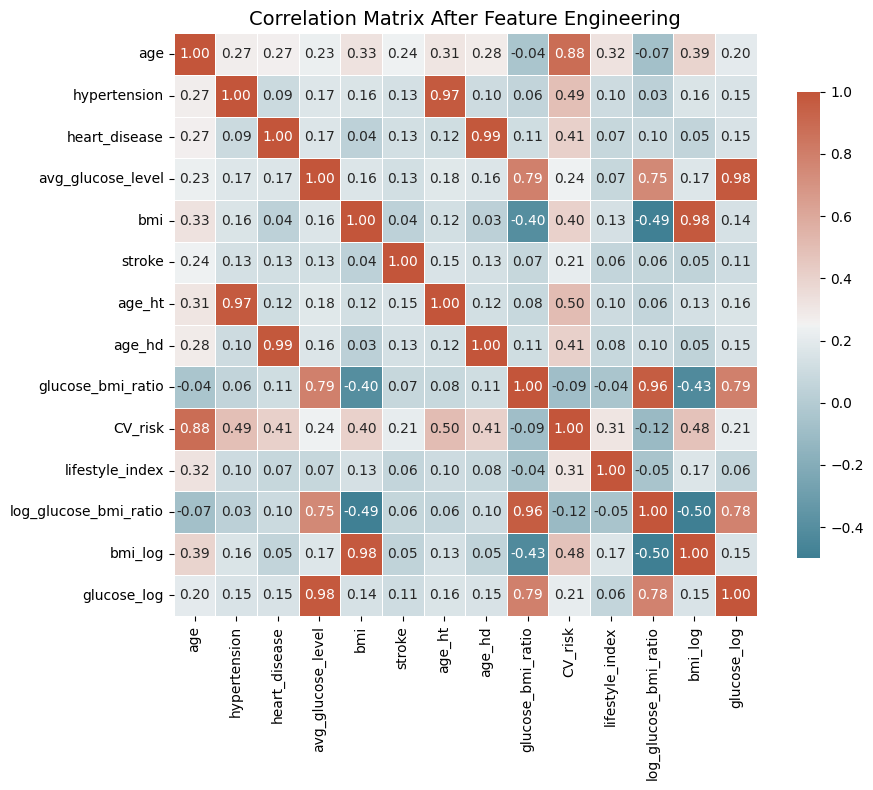

In [18]:
# Select only numerical columns for correlation
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Compute correlation matrix
corr_matrix = train_df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=sns.diverging_palette(220, 20, as_cmap=True),  # can replace with hex if needed
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Correlation Matrix After Feature Engineering", fontsize=14)
plt.tight_layout()
plt.show()

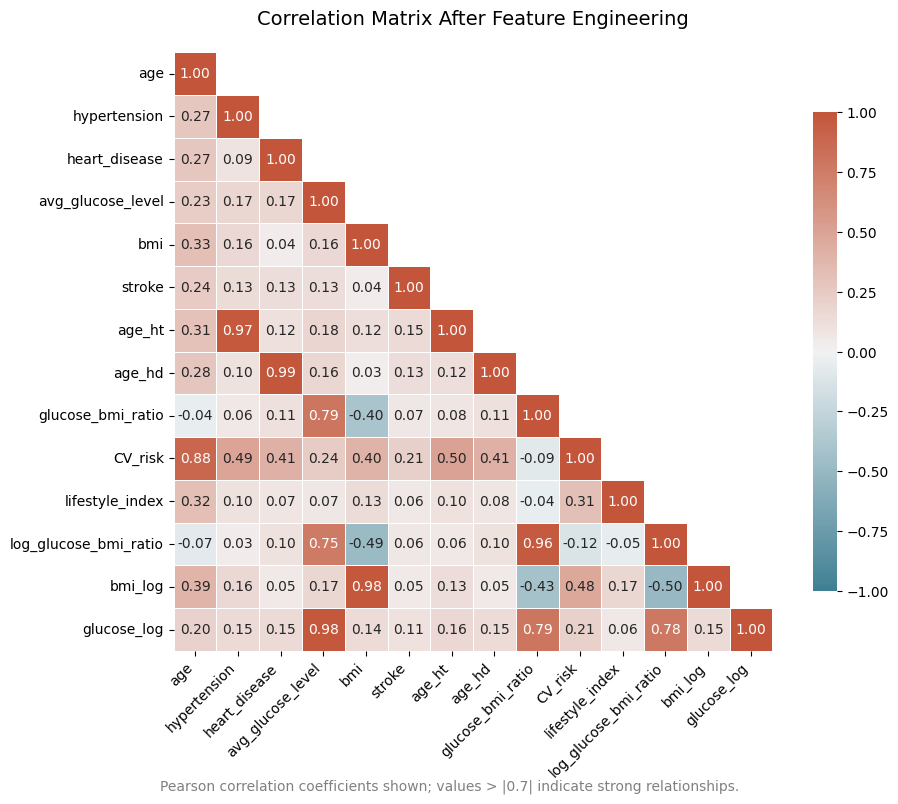

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ── select only numeric columns ────────────────────────────────────────────────
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = train_df[numerical_cols].corr()

# ── build mask to hide only the upper triangle (k=1) ──────────────────────────
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# ── plot setup ────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True,
    annot_kws={"size": 10},
    vmin=-1, vmax=1
)

plt.title("Correlation Matrix After Feature Engineering", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# caption-style note
plt.figtext(
    0.5, 0.005,
    "Pearson correlation coefficients shown; values > |0.7| indicate strong relationships.",
    ha="center", fontsize=10, color='gray'
)

plt.tight_layout()

# ── save ──────────────────────────────────────────────────────────────────────
out_dir = r"F:\stroke-prediction-project\figures"
plt.savefig(f"{out_dir}/correlation_matrix_after_feature_engineering.png", dpi=300, bbox_inches='tight')
plt.savefig(f"{out_dir}/correlation_matrix_after_feature_engineering.pdf", dpi=300, bbox_inches='tight')

plt.show()

In [35]:
train_df.to_csv("F:\\stroke-prediction-project\\data\\processed\\train_step2_5.csv", index=False)
test_df.to_csv("F:\\stroke-prediction-project\\data\\processed\\test_step2_5.csv", index=False)

 # 2.6 — Encode Categorical + Scale Numerical Features

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

In [38]:
# Load your data
train_df = pd.read_csv("F:\\stroke-prediction-project\\data\\processed\\train_step2_5.csv")
test_df = pd.read_csv("F:\\stroke-prediction-project\\data\\processed\\test_step2_5.csv")

In [40]:
# Define features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numeric_features = ['age', 'avg_glucose_level', 'bmi', 'age_ht', 'age_hd']
target = 'stroke'

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

# Split data
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df.drop(columns=[target])
y_test = test_df[target]

# Transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Column names
cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
columns_final = numeric_features + list(cat_names)

# Rebuild DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=columns_final)
X_test_df = pd.DataFrame(X_test_processed, columns=columns_final)

# Add stroke back
train_final = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)
test_final = pd.concat([X_test_df, y_test.reset_index(drop=True)], axis=1)

In [43]:
# Save
train_final.to_csv("F:\\stroke-prediction-project\\data\\processed\\train_encoded_scaled.csv", index=False)
test_final.to_csv("F:\\stroke-prediction-project\\data\\processed\\test_encoded_scaled.csv", index=False)

# 2.7 — Baseline Clinical Model (Logistic Regression)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [45]:
# -------------------------
# Step 1: Use only CV_risk as feature
# -------------------------
X_baseline_train = train_df[['CV_risk']]
y_baseline_train = train_df['stroke']
X_baseline_test = test_df[['CV_risk']]
y_baseline_test = test_df['stroke']

In [46]:
# -------------------------
# Step 2: Train Logistic Regression
# -------------------------
baseline_model = LogisticRegression()
baseline_model.fit(X_baseline_train, y_baseline_train)

LogisticRegression()

In [47]:
# -------------------------
# Step 3: Predict Probabilities
# -------------------------
y_prob = baseline_model.predict_proba(X_baseline_test)[:, 1]
y_pred = baseline_model.predict(X_baseline_test)

In [48]:
# -------------------------
# Step 4: Evaluate
# -------------------------
auc = roc_auc_score(y_baseline_test, y_prob)
acc = accuracy_score(y_baseline_test, y_pred)
print("AUC Score:", round(auc, 4))
print("Accuracy:", round(acc, 4))
print("Classification Report:\n", classification_report(y_baseline_test, y_pred, digits=4))

AUC Score: 0.8136
Accuracy: 0.9511
Classification Report:
               precision    recall  f1-score   support

           0     0.9511    1.0000    0.9749       972
           1     0.0000    0.0000    0.0000        50

    accuracy                         0.9511      1022
   macro avg     0.4755    0.5000    0.4875      1022
weighted avg     0.9045    0.9511    0.9272      1022



F:\stroke-prediction-project\stroke-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

F:\stroke-prediction-project\stroke-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

F:\stroke-prediction-project\stroke-env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



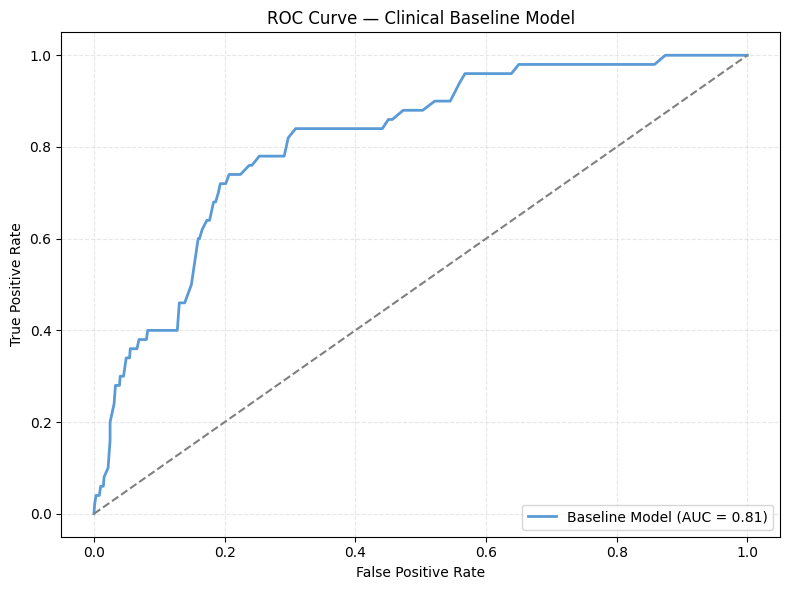

In [49]:
# -------------------------
# Step 5: Plot ROC Curve
# -------------------------
fpr, tpr, _ = roc_curve(y_baseline_test, y_prob)
plot_color = "#5A9BD5"  # You can change this hex to suit your visual palette

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=plot_color, lw=2, label=f'Baseline Model (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Clinical Baseline Model")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

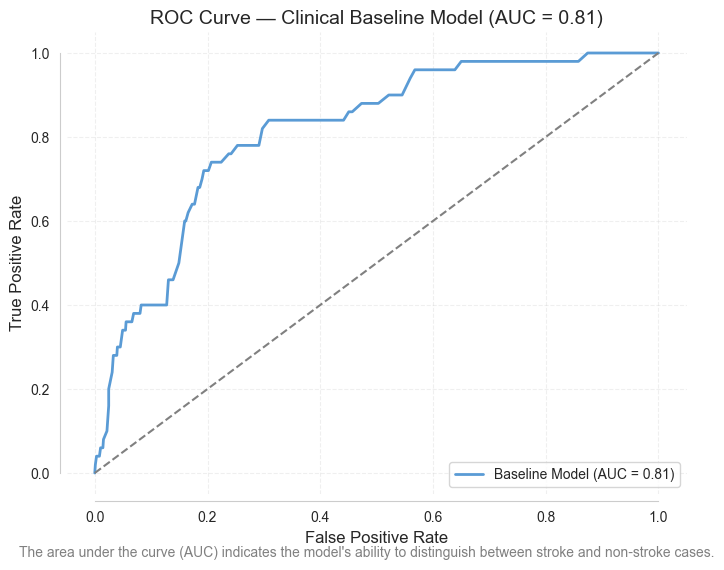

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
import os

# -------------------------
# Step 5: Plot ROC Curve
# -------------------------
fpr, tpr, _ = roc_curve(y_baseline_test, y_prob)

# ✅ Compute AUC value
auc_value = roc_auc_score(y_baseline_test, y_prob)

plot_color = "#5A9BD5"  # Consistent color palette

# Set global font sizes for publication clarity
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=plot_color, lw=2,
         label=f'Baseline Model (AUC = {auc_value:.2f})')  # ✅ Use auc_value
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize appearance
plt.title(f"ROC Curve — Clinical Baseline Model (AUC = {auc_value:.2f})", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Remove top/right borders
sns.despine(ax=plt.gca(), offset=5, trim=True)

# Adjust legend placement
plt.legend(loc='lower right', fontsize=10)

# Optional caption-style note below
plt.figtext(0.5, 0.005,
            "The area under the curve (AUC) indicates the model's ability to distinguish between stroke and non-stroke cases.",
            ha="center", fontsize=10, color='gray')

# Save to specific folder
output_dir = r"F:\stroke-prediction-project\figures"
os.makedirs(output_dir, exist_ok=True)

pdf_path = os.path.join(output_dir, "roc_curve_baseline_model.pdf")
png_path = os.path.join(output_dir, "roc_curve_baseline_model.png")

plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.savefig(png_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

 # 2.8 — Save Processed Data (X/y and full sets)

In [50]:
import os

# Define path
save_path = r"F:\stroke-prediction-project\data\processed"

# Create directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Save X and y separately
X_train_df.to_csv(os.path.join(save_path, "X_train.csv"), index=False)
y_train.to_csv(os.path.join(save_path, "y_train.csv"), index=False)

X_test_df.to_csv(os.path.join(save_path, "X_test.csv"), index=False)
y_test.to_csv(os.path.join(save_path, "y_test.csv"), index=False)

print("✅ Processed data saved to F:\\stroke-prediction-project\\data\\processed\\")

✅ Processed data saved to F:\stroke-prediction-project\data\processed\
